<a href="https://colab.research.google.com/github/cr1sna/Nepali-New-Classifier-BoW/blob/main/Nepali_New_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1 Frequency Analysis and Bag of Words

## Objective
- Learn the keywords of NLP
- Understand basic of NLP
- Explore the Bag of words for basic analysis of text



## Your Details


In [147]:
import datetime
student_rollno = 15
student_name = 'Krishna Gaire'
assignment_tag = 'MDS555-2023-Assignment-1'

In [148]:
# from checker_utils import done
def done(task):
    _date = datetime.datetime.now()
    task = task + ": " + str(_date)
    print('='*len(task), '\n', task , '\n', '='*len(task), sep='')
    pass

## Literature Review
- Put your review of the literature related to Frequency analysis and bag of words
- define terminologies used
- put details of the library used



## Task 1: Dataset Preparation:

Prepare the Nepali news dataset *(hint: you can obtain text from news websites, at least 20 different news of 2/3 different categories)*. Host the dataset in the public git repository.

In [164]:
import ast
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import warnings
warnings.simplefilter(action='ignore')

!git clone git@github.com:cr1sna/ml_nlp-.git

# df = pd.read_csv('setoparty_dataset.csv')
# df.head()

Cloning into 'ml_nlp-'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


<Axes: title={'center': 'Categories and Count'}>

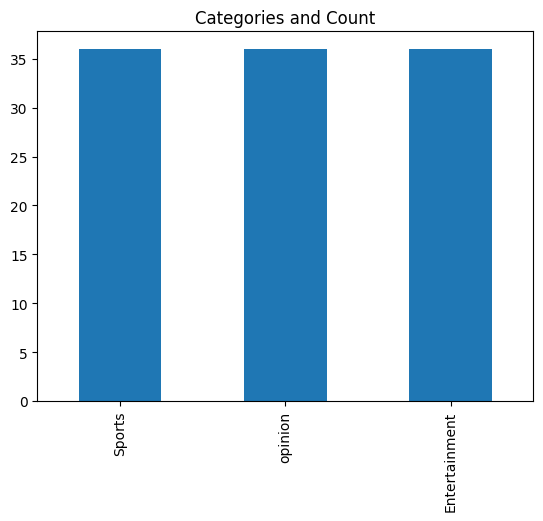

In [150]:
%matplotlib inline
df['Category'].value_counts().plot(kind= 'bar',title = 'Categories and Count')

## Task  2.1: Frequency Analysis

Perform the frequency analysis on the text collected

In [151]:
def check_frequency(nepali_text):
  nepali_word = nepali_text.split(' ')
  frequency_dict = {}
  for word in nepali_word:

      if word in frequency_dict.keys():
          frequency_dict[word] = frequency_dict[word] + 1
      else:
          frequency_dict[word] = 1
  return frequency_dict

nepali_text = df['Input'].tolist()
nepali_text = ' '.join(nepali_text)
print(check_frequency(nepali_text))

{'एसिया': 24, 'कप': 12, '२०२३': 16, 'अन्तर्गत': 13, 'सुपर': 17, 'फोरको': 5, 'खेलमा': 41, 'भारतले': 40, 'पाकिस्तानमाथि': 1, '२२८': 1, 'रनको': 31, 'फराकिलो': 3, 'अन्तरको': 1, 'जित': 15, 'हात': 25, 'पारेको': 17, 'छ।\xa0सोमबार': 1, 'कोलम्बोमा': 6, 'दिएको': 47, '३५७': 2, 'लक्ष्य': 21, 'पछ्याएको': 4, 'पाकिस्तानले': 14, '३२': 3, 'ओभरमा': 28, '१२८': 1, 'रन': 57, 'मात्र': 120, 'बनाउन': 46, 'सक्यो।पाकिस्तानका': 1, 'लागि': 268, 'सबैभन्दा': 14, 'बढी': 46, 'रनमा': 16, 'फखर': 3, 'जमानले': 1, '२७': 7, 'जोडे।': 5, '\xa0अघा': 1, 'सलमान': 2, 'र': 1557, 'इफ्तिखर': 2, 'अहमदले': 1, '२३-२३': 1, 'बनाए।\xa0अरु': 1, 'ब्याट्सम्यान': 5, 'सस्तैमा': 1, 'आउट': 41, 'भए।': 38, 'नशीम': 1, 'शाह': 6, 'हरिस': 1, 'रउफले': 1, 'घाइते': 2, 'भएका': 69, 'कारण': 117, 'ब्याटिङ': 27, 'गर्न': 288, 'सकेनन्।बलिङमा': 1, 'भारतका': 16, 'कुलदिप': 3, 'यादवले': 2, '५': 22, 'विकेट': 22, 'लिए।': 8, 'उनले': 112, '८': 19, '२५': 20, 'खर्चिए।त्यसअघि': 1, 'आइतबार': 3, 'वर्षाले': 10, 'प्रभावित': 12, 'भएपछि': 33, 'सोमबारदेखि': 2, 'सुरु': 19, 'भएको

In [152]:
##check and download font

def download_font():
  !wget -O NotoSans-Thin.ttf https://fonts.gstatic.com/s/notosans/v30/o-0OIpQlx3QUlC5A4PNjhjRFSfiM7HBj.ttf
  !mv NotoSans-Thin.ttf /usr/share/fonts/truetype/
  !fc-cache -fv

def check_font():
    fonts = fm.findSystemFonts()
    for font in fonts:
      if 'NotoSans-Thin' in font:
        return True
    return False

def bar_plot(values,counts,Title=None):
  # Create the bar chart
  plt.bar(values, counts,align='center')
  plt.xticks(fontproperties=fontprop, rotation=45)
  # Add labels and title
  plt.xlabel('Value', fontproperties=fontprop)
  plt.ylabel('Frequency')
  plt.title(f'Frequency Plot of top 10 words {Title}')
  # Show the plot
  plt.show()

def top_frequent_words(nepali_text):
  frequency_dict = check_frequency(nepali_text)
  sorted_c = dict(sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True))
  values = list(sorted_c.keys())[:10]
  counts = list(sorted_c.values())[:10]
  return values,counts

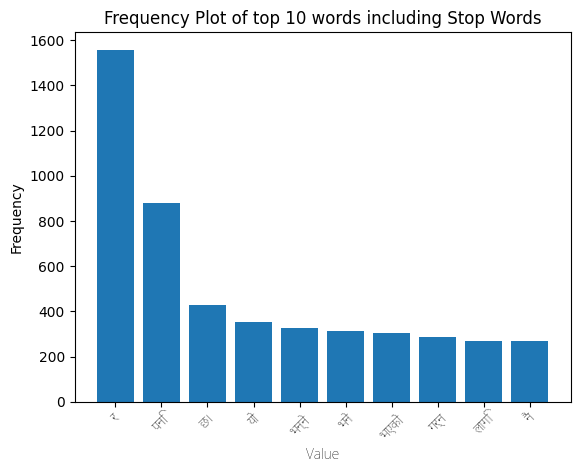

In [153]:
# Frequency plot
is_there_font = check_font()
if  not is_there_font:
  print("font not found so downloading it...")
  download_font()

path = '/usr/share/fonts/truetype/NotoSans-Thin.ttf'
fontprop = fm.FontProperties(fname=path)


nepali_text = df['Input'].tolist()
nepali_text = ' '.join(nepali_text)
values,counts = top_frequent_words(nepali_text)
bar_plot(values,counts,'including Stop Words')

## Task  2.2: Filter Stop words

Improve Performance analysis by filtering stop words (you can also develop rule based )


In [154]:
nltk.download('stopwords')
def word_preprocessing(text):
  sentences = text.strip().split(u"।")
  sentences = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences]
  sentences = ' '.join(sentences)
  sentences = sentences.split()

  stop_word = set(nltk.corpus.stopwords.words('nepali'))
  corpus = []
  for word in sentences:
    if word not in stop_word:
      # Remove special char
      char_to_replace = ['\u202f','\xa0','\u202f','\xa0','संग्रह  सेयर','सेयर','।', ',', ';', '?', '!', '—', '-', '.']
      for char in char_to_replace:
        word =  word.replace(char,'')

      #check for empty string
      if word.strip() != '': # and word.isalpha()
        corpus.append(word)
  return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


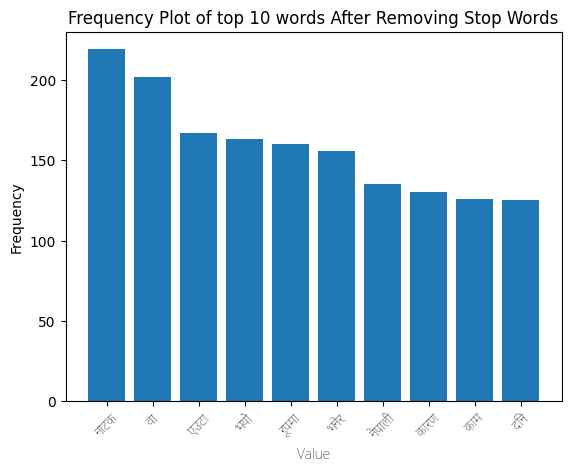

In [155]:
# Frequency plot of top 10 words after removing stop words
nepali_text = df['Input'].tolist()
nepali_text = ' '.join(nepali_text)
nepali_text = word_preprocessing(nepali_text)
nepali_text = ' '.join(nepali_text)
values,counts = top_frequent_words(nepali_text)
bar_plot(values,counts,'After Removing Stop Words')

In [156]:
done('Task 2.2')

Task 2.2: 2023-09-16 17:36:15.938712


## Task 3: BoW

Task 3: BoW: Prepare Bag of Words (BoW) from the dataset


In [157]:
df_opinion = df[df['Category'] == 'opinion']
df_sports = df[df['Category'] == 'sports']
df_entertainment = df[df['Category'] == 'entertainment']

text_in_dataset = ' '.join(df['Input'].tolist())
vocab = word_preprocessing(text_in_dataset)

def get_bag_of_words(tokens, vocab):
   # Create initial dictionary which maps each vocabulary word to a count of 0
   word_count_dict = dict.fromkeys(vocab, 0)
   # For each word in the doc, increment its count
   for word in tokens:
      try:
        word_count_dict[word] += 1
      except:
        pass

   # Now, initialize the vector to a list of zeros
   bag = [0] * len(vocab)
   # For every vocab word, set its index equal to its count
   for i, word in enumerate(vocab):
       bag[i] = word_count_dict[word]
   return bag

## Opinion
text_in_opinion = ' '.join(df_opinion['Input'].tolist())
opinion_tokens = word_preprocessing(text_in_dataset)
opinion_bag_of_words = get_bag_of_words(opinion_tokens,vocab)
# print(opinion_bag_of_words)

## Sports
text_in_sports = ' '.join(df_sports['Input'].tolist())
sports_tokens = word_preprocessing(text_in_sports)
sports_bag_of_words = get_bag_of_words(sports_tokens,vocab)
# print(sports_bag_of_words)

## Entertainment
text_in_entertainment = ' '.join(df_entertainment['Input'].tolist())
entertainment_tokens = word_preprocessing(text_in_entertainment)
entertainment_bag_of_words = get_bag_of_words(entertainment_tokens,vocab)
# print(entertainment_bag_of_words)


In [158]:
done('Task 3')

Task 3: 2023-09-16 17:36:16.523545


## Task 4: Classification

Classify the news based on Keywords and BoW you computed in Task 3.1

In [159]:
input_text = 'चीन किन सधैं तर्किन्छ कालापानीमा\u202f?सुधीर शर्माशक्तिराष्ट्रहरू जब ‘कार्टोग्राफिक एग्रेसन’ तर्फ अग्रसर हुन्छन्, तब ठान्दा हुन्छ— संकटको घडी आउन लाग्यो\u202f। केही समययता दक्षिण एसिया, त्यसमा पनि हिमाली भेगमा यस खाले प्रतिस्पर्धा देखिन थालेको छ\u202f।'

In [160]:
def classification(input_text):
  input_word_tokens = word_preprocessing(input_text)
  input_bag_of_words = get_bag_of_words(input_word_tokens,vocab)


  dist_input_entertainment = np.linalg.norm(  np.array(entertainment_bag_of_words) - np.array(input_bag_of_words))
  dist_input_opinion = np.linalg.norm(  np.array(opinion_bag_of_words) - np.array(input_bag_of_words))
  dist_input_sports = np.linalg.norm(  np.array(sports_bag_of_words) - np.array(input_bag_of_words))
  print(f"Sports distance : {dist_input_sports}\n Entertainment distance : {dist_input_entertainment}\n Opinion distance : {dist_input_opinion} \n " )

  # return base on maximum distance
  dist_dict = {
      'Opinion' : dist_input_opinion,
      'Sports' : dist_input_sports,
      'Entertainment' : dist_input_entertainment
  }
  return max(dist_dict, key=lambda k: dist_dict[k])

In [161]:
classification = classification(input_text)
print(f"Input news is classified as : {classification} category")

Sports distance : 15.968719422671311
 Entertainment distance : 15.968719422671311
 Opinion distance : 9286.34976726593 
 
Input news is classified as : Opinion category


In [162]:
done('Task 4')

Task 4: 2023-09-16 17:36:16.724690
